In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#インストール
!pip install -q japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [3]:
#import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans

In [4]:
#csv読み込み
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI・データサイエンス実践プログラム/中間テスト/exercise.csv')

##Discount

In [5]:
#offer==Discountのデータを抽出
Discount_df = df[df['offer']=='Discount'].drop(['offer'], axis=1)

In [6]:
#offer==Discountのconversion平均（ユーザーの購入確率）
Discount_df['conversion'].mean()

0.18275684047496127

####OneHotEncoding

In [7]:
#OneHotEncoding
hot_Discount_df = pd.get_dummies(Discount_df, dtype=int)
hot_Discount_df.head()

,recency,history,used_discount,used_bogo,is_referral,conversion,zip_code_Rural,zip_code_Surburban,zip_code_Urban,channel_Multichannel,channel_Phone,channel_Web
3,9,675.83,1,0,1,0,1,0,0,0,0,1
8,9,675.07,1,1,1,0,1,0,0,0,1,0
13,2,101.64,0,1,0,1,0,0,1,0,0,1
16,5,29.99,1,0,0,0,0,1,0,0,1,0
17,9,112.35,1,0,0,0,1,0,0,0,0,1


####t検定

In [8]:
#conversionでグループ化
not_buy = hot_Discount_df[hot_Discount_df['conversion']==0]
buy = hot_Discount_df[hot_Discount_df['conversion']==1]

#####recency

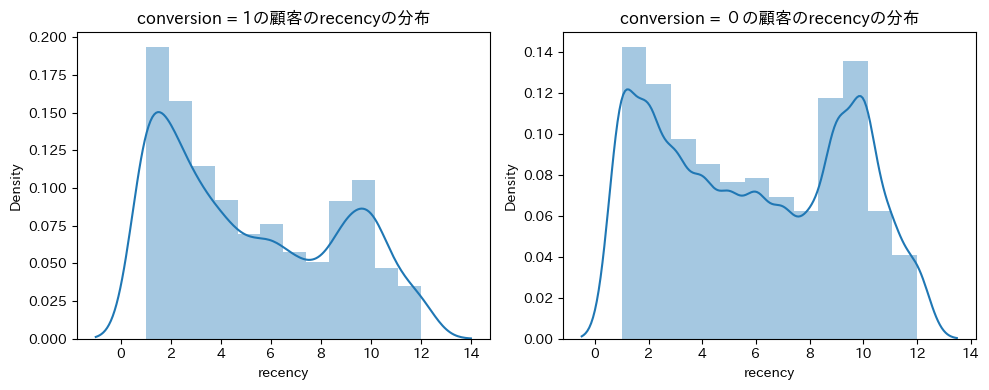

In [9]:
#分布の確認
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
sns.distplot(buy['recency'], bins=12);
plt.title('conversion = 1の顧客のrecencyの分布')
plt.subplot(1, 2, 2)
sns.distplot(not_buy['recency'], bins=12);
plt.title('conversion = ０の顧客のrecencyの分布')
plt.tight_layout()

コルモゴロフ・スミルノフ検定
  - 帰無仮説：正規分布である
  - 対立仮説：正規分布でない

In [10]:
# コルモゴロフ・スミルノフ検定
stats.kstest(buy['recency'],"norm",args=(buy['recency'].mean(), buy['recency'].std()))

KstestResult(statistic=0.1609574544672055, pvalue=1.3232915081887845e-88, statistic_location=3, statistic_sign=1)

In [11]:
# コルモゴロフ・スミルノフ検定
stats.kstest(not_buy['recency'],"norm",args=(not_buy['recency'].mean(), not_buy['recency'].std()))

KstestResult(statistic=0.13777621591108025, pvalue=8.68901329054542e-289, statistic_location=9, statistic_sign=-1)

p < 0.05のため帰無仮説を棄却

正規分布ではないと解釈

データの対応がないノンパラメトリック検定
（マンホイットニーのU検定）

帰無仮説（H_0）: 2 群間の平均値に差がない

対立仮説（H_1）: 2 群間の平均値に差がある

In [12]:
# Mann-Whitney(マンホイットニー)のU検定
stats.mannwhitneyu(buy["recency"], not_buy["recency"], alternative='two-sided')

MannwhitneyuResult(statistic=29839840.5, pvalue=5.727925519776182e-32)

p < 0.05のため帰無仮説を棄却

2 群間の平均値に差がある -> recencyがconversionへ影響を与えていると解釈

#####history

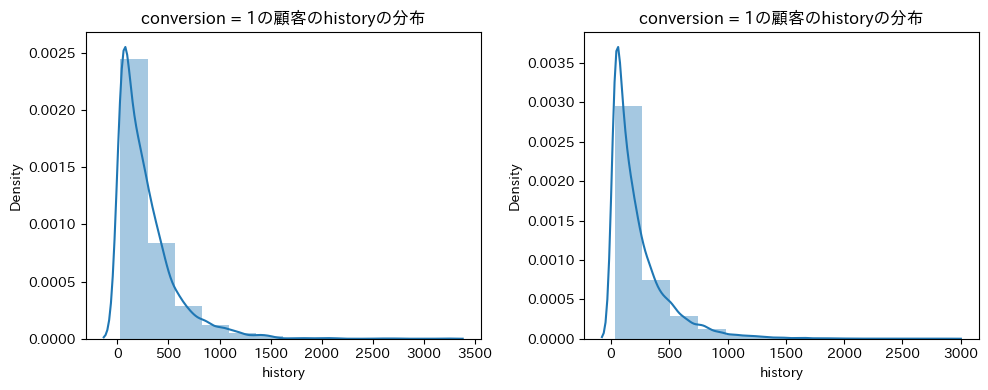

In [13]:
#分布の確認
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
sns.distplot(buy['history'], bins=12);
plt.title('conversion = 1の顧客のhistoryの分布')
plt.subplot(1, 2, 2)
sns.distplot(not_buy['history'], bins=12);
plt.title('conversion = 1の顧客のhistoryの分布')
plt.tight_layout()

コルモゴロフ・スミルノフ検定

  - 帰無仮説：正規分布である

  - 対立仮説：正規分布でない

In [14]:
# コルモゴロフ・スミルノフ検定
stats.kstest(buy['history'],"norm",args=(buy['history'].mean(), buy['history'].std()))

KstestResult(statistic=0.1882428713513808, pvalue=2.7432304690833515e-121, statistic_location=29.99, statistic_sign=-1)

In [15]:
# コルモゴロフ・スミルノフ検定
stats.kstest(not_buy['history'],"norm",args=(not_buy['history'].mean(), not_buy['history'].std()))

KstestResult(statistic=0.21064173727110064, pvalue=0.0, statistic_location=29.99, statistic_sign=-1)

p < 0.05のため帰無仮説を棄却

正規分布ではないと解釈

データの対応がないノンパラメトリック検定 （マンホイットニーのU検定）

帰無仮説（H_0）: 2 群間の平均値に差がない

対立仮説（H_1）: 2 群間の平均値に差がある

In [16]:
# Mann-Whitney(マンホイットニー)のU検定
stats.mannwhitneyu(buy["history"], not_buy["history"], alternative='two-sided')

MannwhitneyuResult(statistic=37846655.5, pvalue=5.54042169361182e-30)

p < 0.05のため帰無仮説を棄却

2 群間の平均値に差がある -> recencyがconversionへ影響を与えていると解釈


####クラスタリング

In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [57]:
#数値型を抽出
number = hot_Discount_df[['history', 'recency']]
x = scaler.fit_transform(number.values)
type(x)

numpy.ndarray

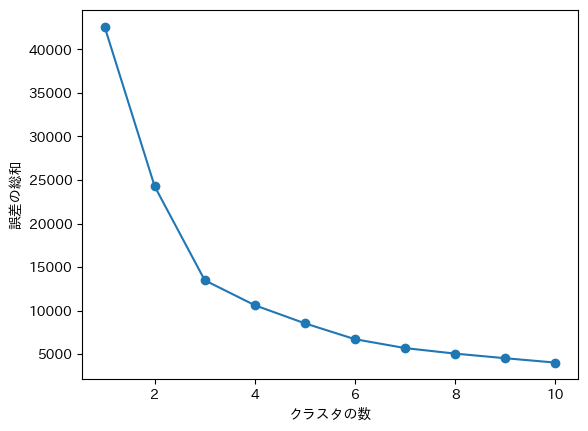

In [60]:
#エルボー法
distortions = []
for i  in range(1,11):
    km = KMeans(n_clusters=i,
                n_init=10,
                random_state=0)
    km.fit(x)
    distortions.append(km.inertia_)

plt.plot(range(1,11),distortions,marker='o')
plt.xlabel('クラスタの数')
plt.ylabel('誤差の総和')
plt.show()

最適クラスタ数：3

In [61]:
#インスタンス化
#エルボー法でクラスタの数を３に決定
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(x)

KMeans(n_clusters=3, random_state=0)

In [62]:
# クラスタリングの実行
cluster = kmeans.labels_
print(cluster)

[0 0 2 ... 2 2 2]


In [63]:
# clusterカラムの追加
hot_Discount_df['cluster'] = cluster
hot_Discount_df.head()

,recency,history,used_discount,used_bogo,is_referral,conversion,zip_code_Rural,zip_code_Surburban,zip_code_Urban,channel_Multichannel,channel_Phone,channel_Web,cluster
3,9,675.83,1,0,1,0,1,0,0,0,0,1,0
8,9,675.07,1,1,1,0,1,0,0,0,1,0,0
13,2,101.64,0,1,0,1,0,0,1,0,0,1,2
16,5,29.99,1,0,0,0,0,1,0,0,1,0,2
17,9,112.35,1,0,0,0,1,0,0,0,0,1,1


In [64]:
# クラスタごとの顧客データ数
groups = hot_Discount_df[['recency', 'history', 'conversion', 'cluster']].groupby('cluster')
groups.size()

cluster
0    2673
1    8804
2    9830
dtype: int64

In [65]:
groups.agg(['mean'])

,recency,history,conversion
,mean,mean,mean
cluster,,,
0,3.364759,781.152233,0.226337
1,9.407428,157.819529,0.149478
2,3.174161,172.598386,0.200712


cluster==0 or cluster==2は購入確率が0.182を上回っているため購入の確度が高いグループといえる

Text(0.5, 1.0, 'recency・historyとクラスタ・conversionとの関係')

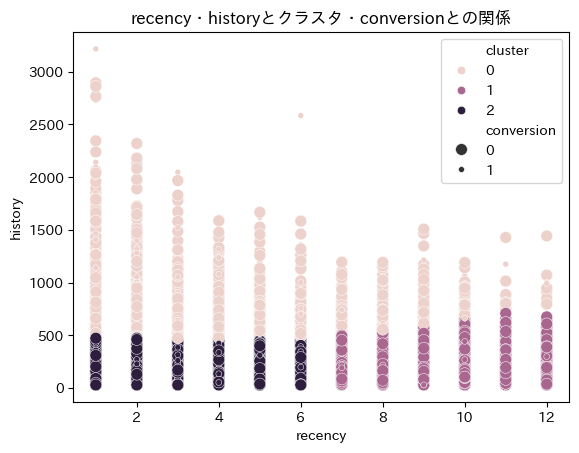

In [66]:
#クラスタの確認
sns.scatterplot(x='recency', y='history', hue='cluster', size='conversion', data=hot_Discount_df);
plt.title('recency・historyとクラスタ・conversionとの関係')

cluster==0:historyが中間のグループ

cluster==1:historyが小さいグループ

cluster==2:historyが大きいグループ

####χ二乗検定

帰無仮説（H_0）：二つの変数は独立である。

対立仮説（H_1）：二つの変数は独立ではない。

In [25]:
category = ['used_discount', 'used_bogo', 'is_referral',
       'zip_code_Rural', 'zip_code_Surburban', 'zip_code_Urban',
       'channel_Multichannel', 'channel_Phone', 'channel_Web','conversion']

In [26]:
#χ2乗検定でp < 0.05の列を出力
from scipy import stats
for col in category:
    crosstab = pd.crosstab(hot_Discount_df['conversion'], hot_Discount_df[col])
    chi2, p, dof, ef = stats.chi2_contingency(crosstab, correction=False)
    if p < 0.05:
        print('列名：'+ col)
        print(f'p 値:{p}')
        print('---')

列名：used_discount
p 値:2.382457266121364e-08
---
列名：used_bogo
p 値:2.636441967345585e-06
---
列名：is_referral
p 値:2.0695601576136225e-27
---
列名：zip_code_Rural
p 値:1.5215308993865983e-12
---
列名：zip_code_Surburban
p 値:0.0014362678539822473
---
列名：channel_Multichannel
p 値:5.6981076887715076e-05
---
列名：channel_Phone
p 値:3.9572114220769366e-11
---
列名：channel_Web
p 値:7.944482077046295e-05
---
列名：conversion
p 値:0.0
---


上記の項目は帰無仮説を棄却

p値が小さいほど帰無仮説を強く棄却できるため、与える影響も大きいと仮定

In [27]:
group2=hot_Discount_df[category].groupby('conversion')

In [28]:
group2.mean()

,used_discount,used_bogo,is_referral,zip_code_Rural,zip_code_Surburban,zip_code_Urban,channel_Multichannel,channel_Phone,channel_Web
conversion,,,,,,,,,
0,0.541951,0.543847,0.519095,0.143973,0.451042,0.404985,0.116694,0.444266,0.439040
1,0.591166,0.585259,0.422958,0.189009,0.422958,0.388033,0.139959,0.386235,0.473806


カテゴリの条件：is_referral==0 and zip_code_Rural==1

p値が小さい順に2つ採用

In [29]:
#カテゴリの条件
discussion = hot_Discount_df.query('is_referral==0 and zip_code_Rural==1')
#数値の条件
discussion = discussion.query('cluster==0 or cluster==2')
discussion.shape

(440, 13)

In [30]:
#条件適用後のconversion確率
discussion['conversion'].mean()

0.29545454545454547

offer==BuyOneGetOneでも同様に分析

##BuyOneGetOne

In [31]:
#offer==BuyOneGetOneのデータを抽出
BuyOne_df = df[df['offer']=='Buy One Get One'].drop(['offer'], axis=1)

In [32]:
#offer==BuyOneGetOneのconversion平均（ユーザーの購入確率）
BuyOne_df['conversion'].mean()

0.151400383410483

####OneHotEncoding

In [33]:
#OneHotEncoding
hot_BuyOne_df = pd.get_dummies(BuyOne_df, dtype=int)
hot_BuyOne_df.head()

,recency,history,used_discount,used_bogo,is_referral,conversion,zip_code_Rural,zip_code_Surburban,zip_code_Urban,channel_Multichannel,channel_Phone,channel_Web
0,10,142.44,1,0,0,0,0,1,0,0,1,0
2,7,180.65,0,1,1,0,0,1,0,0,0,1
4,2,45.34,1,0,0,0,0,0,1,0,0,1
5,6,134.83,0,1,0,1,0,1,0,0,1,0
6,9,280.20,1,0,1,0,0,1,0,0,1,0


####t検定

In [34]:
#conversionでグループ化
_not_buy = hot_BuyOne_df[hot_BuyOne_df['conversion']==0]
_buy = hot_BuyOne_df[hot_BuyOne_df['conversion']==1]

#####recency

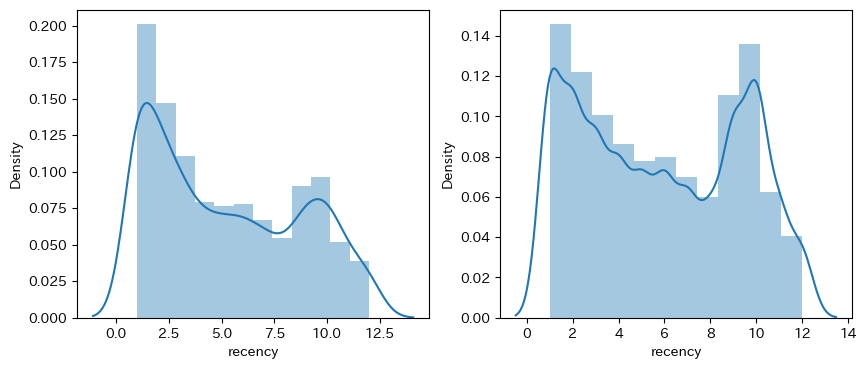

In [35]:
#分布の確認
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
sns.distplot(_buy['recency'], bins=12);
plt.subplot(1, 2, 2)
sns.distplot(_not_buy['recency'], bins=12);

帰無仮説：正規分布である

対立仮説：正規分布でない

In [36]:
# コルモゴロフ・スミルノフ検定
stats.kstest(_buy['recency'],"norm",args=(_buy['recency'].mean(), _buy['recency'].std()))

KstestResult(statistic=0.15780987719932937, pvalue=6.680849484171331e-71, statistic_location=3, statistic_sign=1)

In [37]:
# コルモゴロフ・スミルノフ検定
stats.kstest(_not_buy['recency'],"norm",args=(_not_buy['recency'].mean(), _not_buy['recency'].std()))

KstestResult(statistic=0.13480715289548417, pvalue=4.149298959232639e-288, statistic_location=9, statistic_sign=-1)

p < 0.05のため帰無仮説を棄却

データの対応がないノンパラメトリック検定

帰無仮説（H_0）: 2 群間の平均値に差がない

対立仮説（H_1）: 2 群間の平均値に差がある

In [38]:
# Mann-Whitney(マンホイットニー)のU検定
stats.mannwhitneyu(_buy["recency"], _not_buy["recency"], alternative='two-sided')

MannwhitneyuResult(statistic=26268507.5, pvalue=4.006245702665157e-22)

p < 0.05のため帰無仮説を棄却

#####history

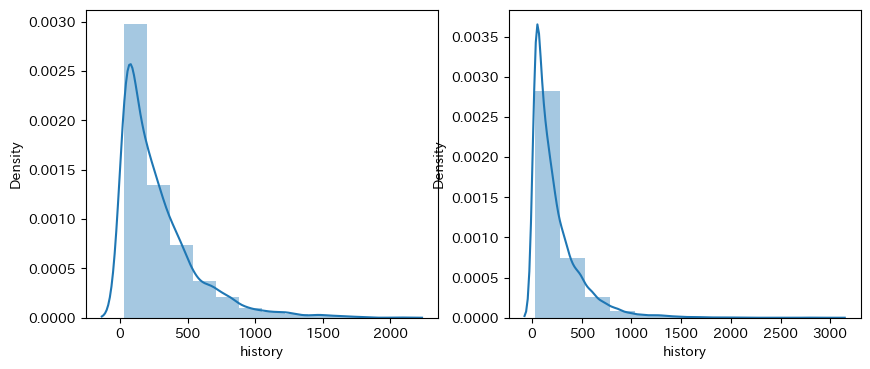

In [39]:
#分布の確認
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
sns.distplot(_buy['history'], bins=12);
plt.subplot(1, 2, 2)
sns.distplot(_not_buy['history'], bins=12);

帰無仮説：正規分布である

対立仮説：正規分布でない

In [40]:
# コルモゴロフ・スミルノフ検定
stats.kstest(_buy['history'],"norm",args=(_buy['history'].mean(), _buy['history'].std()))

KstestResult(statistic=0.18329990483834324, pvalue=1.0940379549269718e-95, statistic_location=29.99, statistic_sign=-1)

In [41]:
# コルモゴロフ・スミルノフ検定
stats.kstest(_not_buy['history'],"norm",args=(_not_buy['history'].mean(), _not_buy['history'].std()))

KstestResult(statistic=0.20578483537922226, pvalue=0.0, statistic_location=29.99, statistic_sign=-1)

p < 0.05のため帰無仮説を棄却

帰無仮説（H_0）: 2 群間の平均値に差がない

対立仮説（H_1）: 2 群間の平均値に差がある

In [42]:
# Mann-Whitney(マンホイットニー)のU検定
stats.mannwhitneyu(_buy["history"], _not_buy["history"], alternative='two-sided')

MannwhitneyuResult(statistic=32382644.0, pvalue=1.7445225350899524e-20)

p < 0.05のため帰無仮説を棄却



####クラスタリング

In [43]:
#数値型を抽出
_number = hot_BuyOne_df[['history', 'recency']]
_x = _number.values
type(_x)

numpy.ndarray

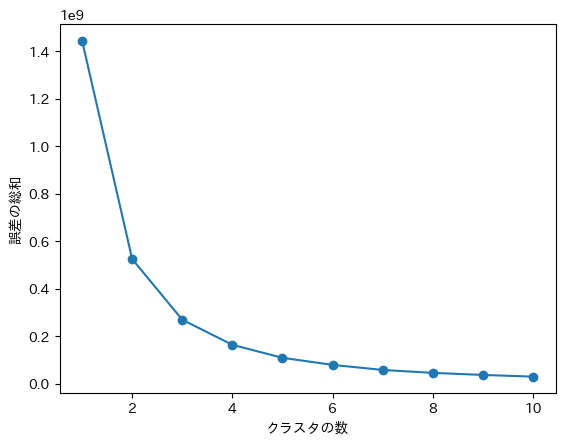

In [44]:
#エルボー法
_distortions = []
for i  in range(1,11):
    _km = KMeans(n_clusters=i,
                n_init=10,
                random_state=0)
    _km.fit(x)
    _distortions.append(_km.inertia_)

plt.plot(range(1,11),_distortions,marker='o')
plt.xlabel('クラスタの数')
plt.ylabel('誤差の総和')
plt.show()

In [45]:
#エルボー法でクラスタの数を３に決定
#Discountと同じインスタンスを使用
kmeans.fit(_x)

KMeans(n_clusters=3, random_state=0)

In [46]:
# クラスタリングの実行
_cluster = kmeans.labels_
print(_cluster)

[0 0 0 ... 1 1 1]


In [47]:
# clusterカラムの追加
hot_BuyOne_df['cluster'] = _cluster
hot_BuyOne_df.head()

,recency,history,used_discount,used_bogo,is_referral,conversion,zip_code_Rural,zip_code_Surburban,zip_code_Urban,channel_Multichannel,channel_Phone,channel_Web,cluster
0,10,142.44,1,0,0,0,0,1,0,0,1,0,0
2,7,180.65,0,1,1,0,0,1,0,0,0,1,0
4,2,45.34,1,0,0,0,0,0,1,0,0,1,0
5,6,134.83,0,1,0,1,0,1,0,0,1,0,0
6,9,280.20,1,0,1,0,0,1,0,0,1,0,1


In [48]:
_groups = hot_BuyOne_df[['recency', 'history', 'conversion', 'cluster']].groupby('cluster')
_groups.size()

cluster
0    14754
1     5531
2     1102
dtype: int64

In [49]:
_groups.agg(['mean'])

,recency,history,conversion
,mean,mean,mean
cluster,,,
0,6.269961,111.702441,0.136166
1,4.949738,435.831499,0.179895
2,3.151543,1024.037341,0.212341


cluster==1 or cluster==2は購入確率が0.151を上回っているため購入の確度が高いグループといえる

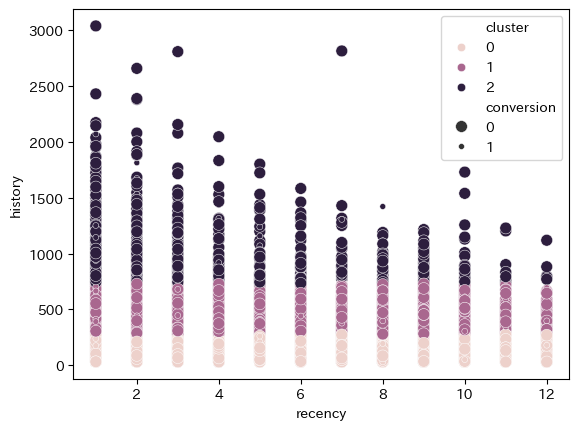

In [50]:
#クラスターの確認
sns.scatterplot(x='recency', y='history', hue='cluster', size='conversion', data=hot_BuyOne_df);

cluster==0:historyが小さいのグループ

cluster==1:historyが中間のグループ

cluster==2:historyが大きいグループ

####χ二乗検定

帰無仮説（H_0）：二つの変数は独立である。

対立仮説（H_1）：二つの変数は独立ではない。

In [51]:
#χ2乗検定でp < 0.05の列を出力
from scipy import stats
for col in category:
    crosstab = pd.crosstab(hot_BuyOne_df['conversion'], hot_BuyOne_df[col])
    chi2, p, dof, ef = stats.chi2_contingency(crosstab, correction=False)
    if p < 0.05:
        print('列名：'+ col)
        print(f'p 値:{p}')
        print('---')

列名：used_discount
p 値:1.0266202328707627e-11
---
列名：used_bogo
p 値:1.6370442390004977e-50
---
列名：is_referral
p 値:8.968968617611939e-20
---
列名：zip_code_Rural
p 値:9.881233326638437e-08
---
列名：zip_code_Urban
p 値:0.01089796994864498
---
列名：channel_Multichannel
p 値:0.0002486799341078541
---
列名：channel_Phone
p 値:1.0838036627708923e-12
---
列名：channel_Web
p 値:2.3291739167280277e-06
---
列名：conversion
p 値:0.0
---


上記の項目は帰無仮説を棄却

p値が小さいほど帰無仮説を強く棄却できるため、与える影響も大きいと仮定

In [52]:
_group2=hot_BuyOne_df[category].groupby('conversion')

In [53]:
_group2.mean()

,used_discount,used_bogo,is_referral,zip_code_Rural,zip_code_Surburban,zip_code_Urban,channel_Multichannel,channel_Phone,channel_Web
conversion,,,,,,,,,
0,0.558708,0.528624,0.516392,0.143259,0.453083,0.403659,0.117141,0.452256,0.430602
1,0.494132,0.670476,0.429586,0.179432,0.440704,0.379864,0.139901,0.384805,0.475293


カテゴリの条件：used_bogo==1 and is_referral==0 and channel_Phone==0

p値が小さい順に3つ採用

In [54]:
#カテゴリの条件
discussion = hot_BuyOne_df.query('used_bogo==1 and is_referral==0 and channel_Phone==0')
#数値の条件
discussion = discussion.query('cluster==1 or cluster==2')
discussion.shape

(1072, 13)

In [55]:
#条件適用後の購入確率
discussion['conversion'].mean()

0.24440298507462688